In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cấu hình hiển thị
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [20]:
# Đường dẫn tương đối từ folder 'util' ra 'datasets/viettel'
folder_path = '../datasets/viettel'
file_name = 'viettel.csv' # Hoặc 'data_3_months.csv' tùy tên file bạn đã lưu
file_path = os.path.join(folder_path, file_name)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Đã load dữ liệu thành công: {df.shape[0]} dòng, {df.shape[1]} cột")
    display(df.head())
else:
    print(f"Lỗi: Không tìm thấy file tại {file_path}")

Đã load dữ liệu thành công: 1048575 dòng, 8 cột


,update_time,enodeb,cell_name,ps_traffic_mb,avg_rrc_connected_user,prb_dl_used,prb_dl_available_total,date_hour
0,45:00.0,enodebF,enodebF121,867.34,12.866667,137.5,15.0,2025-10-31-18
1,45:00.0,enodebF,enodebF112,590.75,22.455556,127.5,15.0,2025-10-31-18
2,45:00.0,enodebG,enodebG1,916.76,19.005556,297.5,15.0,2025-10-31-18
3,45:00.0,enodebG,enodebG21B012,0.00,0.000000,67.5,15.0,2025-10-31-18
4,45:00.0,enodebG,enodebG7,69.88,2.083334,87.5,15.0,2025-10-31-18


In [21]:
# 1. Chuyển đổi date_hour thành dạng datetime
# Format '2025-10-31-18' tương ứng với '%Y-%m-%d-%H'
df['base_time'] = pd.to_datetime(df['date_hour'], format='%Y-%m-%d-%H')

# 2. Xử lý update_time để lấy số phút
# Hàm xử lý chuỗi "45:00.0" -> lấy 45
def extract_minutes(time_str):
    try:
        # Chuyển về string, split theo dấu ':' và lấy phần tử đầu tiên
        return int(str(time_str).split(':')[0])
    except:
        return 0

df['minute_offset'] = df['update_time'].apply(extract_minutes)

# 3. Tạo cột timestamp cuối cùng
df['timestamp'] = df['base_time'] + pd.to_timedelta(df['minute_offset'], unit='m')

# Sắp xếp dữ liệu theo thời gian
df = df.sort_values(by=['cell_name', 'timestamp'])

# Xóa các cột tạm nếu muốn gọn
df_clean = df.drop(columns=['base_time', 'minute_offset'])

print("Dữ liệu sau khi xử lý thời gian:")
display(df_clean[['date_hour', 'update_time', 'timestamp', 'cell_name']].head())

Dữ liệu sau khi xử lý thời gian:


,date_hour,update_time,timestamp,cell_name
1048030,2025-07-10-17,45:00.0,2025-07-10 17:45:00,enodebA1
1046990,2025-07-10-18,00:00.0,2025-07-10 18:00:00,enodebA1
1047786,2025-07-10-18,15:00.0,2025-07-10 18:15:00,enodebA1
1047118,2025-07-10-19,15:00.0,2025-07-10 19:15:00,enodebA1
1047930,2025-07-10-19,45:00.0,2025-07-10 19:45:00,enodebA1


In [22]:
print("Thông tin dữ liệu:")
print(df_clean.info())

print("\nThống kê mô tả:")
display(df_clean.describe())

# Kiểm tra số lượng cell_name khác nhau
num_cells = df_clean['cell_name'].nunique()
print(f"\nTổng số lượng trạm (unique cell_name): {num_cells}")

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 1048030 to 64770
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   update_time             1048575 non-null  object        
 1   enodeb                  1048575 non-null  object        
 2   cell_name               1048575 non-null  object        
 3   ps_traffic_mb           1048459 non-null  float64       
 4   avg_rrc_connected_user  1048575 non-null  float64       
 5   prb_dl_used             1047327 non-null  float64       
 6   prb_dl_available_total  1047327 non-null  float64       
 7   date_hour               1048575 non-null  object        
 8   timestamp               1048575 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 80.0+ MB
None

Thống kê mô tả:


,ps_traffic_mb,avg_rrc_connected_user,prb_dl_used,prb_dl_available_total,timestamp
count,1.048459e+06,1.048575e+06,1.047327e+06,1.047327e+06,1048575
mean,5.194585e+02,1.374125e+01,2.035877e+02,1.364082e+01,2025-09-06 06:45:24.266933760
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2025-07-10 10:30:00
25%,1.631000e+01,2.155556e+00,6.750000e+01,1.500000e+01,2025-08-08 01:45:00
50%,2.672000e+02,9.250000e+00,8.750000e+01,1.500000e+01,2025-09-06 07:00:00
75%,7.474300e+02,1.968889e+01,2.675000e+02,1.500000e+01,2025-10-05 23:15:00
max,1.070828e+04,7.095278e+02,1.520000e+03,2.700000e+01,2025-10-31 23:45:00
std,6.815434e+02,1.624387e+01,2.379973e+02,4.304878e+00,NaN



Tổng số lượng trạm (unique cell_name): 113


Top 5 trạm có traffic cao nhất: ['enodebB9', 'enodebB7', 'enodebB1', 'enodebH1', 'enodebE51B281']


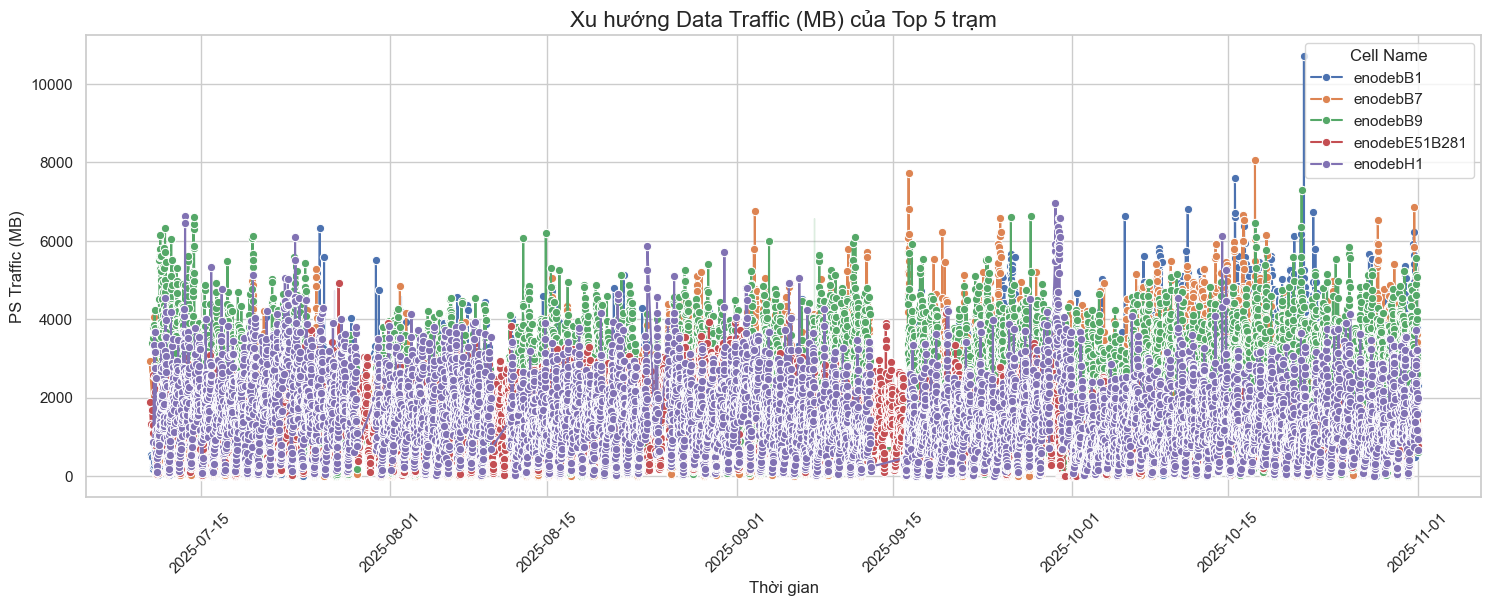

In [23]:
# Tính tổng traffic của từng trạm để tìm ra trạm hoạt động mạnh nhất
top_cells = df_clean.groupby('cell_name')['ps_traffic_mb'].sum().sort_values(ascending=False).head(5).index.tolist()

print(f"Top 5 trạm có traffic cao nhất: {top_cells}")

# Lọc dữ liệu chỉ của 5 trạm này
df_top = df_clean[df_clean['cell_name'].isin(top_cells)]

# Vẽ biểu đồ Traffic
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_top, x='timestamp', y='ps_traffic_mb', hue='cell_name', marker='o')
plt.title('Xu hướng Data Traffic (MB) của Top 5 trạm', fontsize=16)
plt.ylabel('PS Traffic (MB)')
plt.xlabel('Thời gian')
plt.xticks(rotation=45)
plt.legend(title='Cell Name')
plt.grid(True)
plt.show()

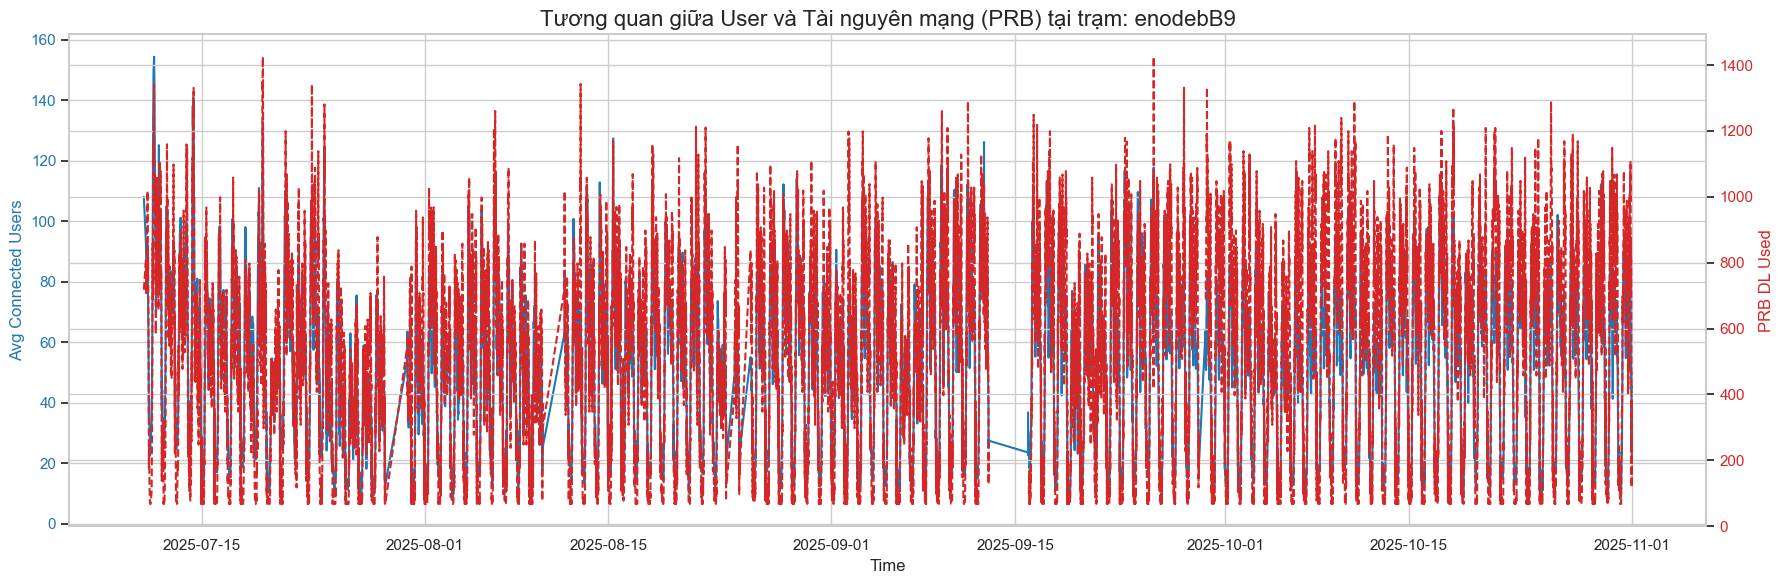

In [24]:
# Lấy trạm lớn nhất
target_cell = top_cells[0]
df_one_cell = df_clean[df_clean['cell_name'] == target_cell]

fig, ax1 = plt.subplots(figsize=(18, 6))

# Trục Y bên trái: User
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Avg Connected Users', color=color)
ax1.plot(df_one_cell['timestamp'], df_one_cell['avg_rrc_connected_user'], color=color, label='Users')
ax1.tick_params(axis='y', labelcolor=color)

# Trục Y bên phải: PRB Used
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('PRB DL Used', color=color)
ax2.plot(df_one_cell['timestamp'], df_one_cell['prb_dl_used'], color=color, linestyle='--', label='PRB Used')
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'Tương quan giữa User và Tài nguyên mạng (PRB) tại trạm: {target_cell}', fontsize=16)
fig.tight_layout() 
plt.show()

✅ Tìm thấy trạm enodebB9.
📅 Các tháng có dữ liệu: ['2025-07' '2025-08' '2025-09' '2025-10']
📊 Đang vẽ biểu đồ cho tháng 2025-10 với 2905 điểm dữ liệu...


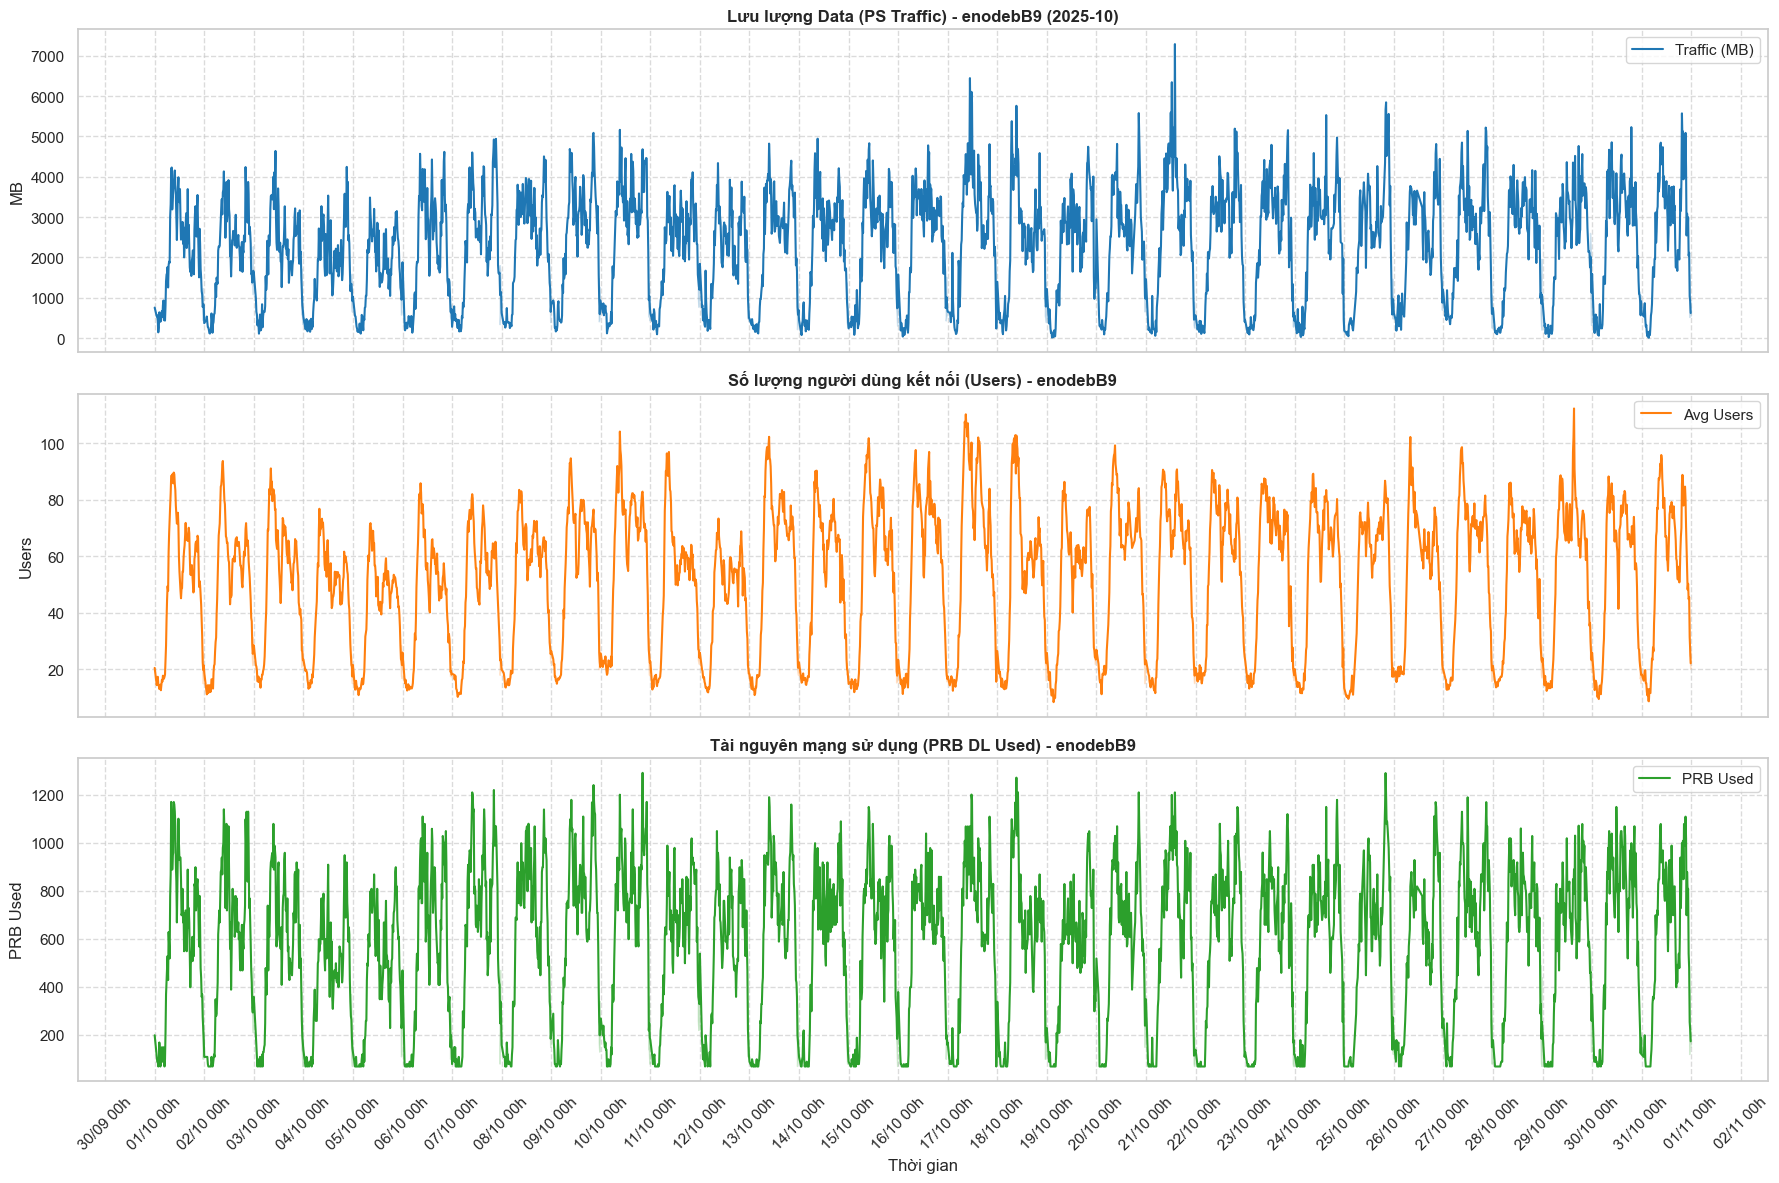

In [26]:
import matplotlib.dates as mdates

# --- CẤU HÌNH ---
target_cell_name = 'enodebB9'  # Tên trạm cần soi
# LƯU Ý: Bạn cần thay đổi tháng dưới đây cho khớp với dữ liệu của bạn (VD: '2025-10', '2025-11', '2025-12')
target_month = '2025-10'       

# --- BƯỚC 1: KIỂM TRA DỮ LIỆU CÓ SẴN ---
# Lọc trạm
df_cell = df_clean[df_clean['cell_name'] == target_cell_name].copy()

if df_cell.empty:
    print(f"❌ Lỗi: Không tìm thấy dữ liệu cho trạm '{target_cell_name}'.")
    print("Các trạm có trong dữ liệu là:", df_clean['cell_name'].unique()[:10]) # In thử 10 trạm
else:
    # In ra các tháng có dữ liệu để bạn dễ chọn
    available_months = df_cell['timestamp'].dt.strftime('%Y-%m').unique()
    print(f"✅ Tìm thấy trạm {target_cell_name}.")
    print(f"📅 Các tháng có dữ liệu: {available_months}")

    # --- BƯỚC 2: LỌC THEO THÁNG ---
    df_plot = df_cell[df_cell['timestamp'].dt.strftime('%Y-%m') == target_month].sort_values('timestamp')

    if df_plot.empty:
        print(f"❌ Cảnh báo: Trạm {target_cell_name} có tồn tại nhưng KHÔNG có dữ liệu trong tháng {target_month}.")
        print(f"👉 Hãy đổi biến 'target_month' thành một trong các tháng sau: {available_months}")
    else:
        print(f"📊 Đang vẽ biểu đồ cho tháng {target_month} với {len(df_plot)} điểm dữ liệu...")

        # --- BƯỚC 3: VẼ BIỂU ĐỒ (3 chỉ số quan trọng) ---
        fig, axes = plt.subplots(3, 1, figsize=(18, 12), sharex=True)

        # Biểu đồ 1: PS Traffic
        sns.lineplot(ax=axes[0], data=df_plot, x='timestamp', y='ps_traffic_mb', color='tab:blue', label='Traffic (MB)')
        axes[0].set_title(f'Lưu lượng Data (PS Traffic) - {target_cell_name} ({target_month})', fontweight='bold')
        axes[0].set_ylabel('MB')
        axes[0].grid(True, linestyle='--', alpha=0.7)
        axes[0].legend(loc='upper right')

        # Biểu đồ 2: User Active
        sns.lineplot(ax=axes[1], data=df_plot, x='timestamp', y='avg_rrc_connected_user', color='tab:orange', label='Avg Users')
        axes[1].set_title(f'Số lượng người dùng kết nối (Users) - {target_cell_name}', fontweight='bold')
        axes[1].set_ylabel('Users')
        axes[1].grid(True, linestyle='--', alpha=0.7)
        axes[1].legend(loc='upper right')

        # Biểu đồ 3: PRB Usage (Tài nguyên mạng)
        sns.lineplot(ax=axes[2], data=df_plot, x='timestamp', y='prb_dl_used', color='tab:green', label='PRB Used')
        axes[2].set_title(f'Tài nguyên mạng sử dụng (PRB DL Used) - {target_cell_name}', fontweight='bold')
        axes[2].set_ylabel('PRB Used')
        axes[2].set_xlabel('Thời gian')
        axes[2].grid(True, linestyle='--', alpha=0.7)
        axes[2].legend(loc='upper right')

        # Format trục thời gian cho dễ nhìn (Ngày/Giờ)
        axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %Hh'))
        axes[2].xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Mỗi ngày hiện 1 vạch
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

📊 Đang vẽ biểu đồ tuần: 01/08 - 08/08 (662 điểm dữ liệu)


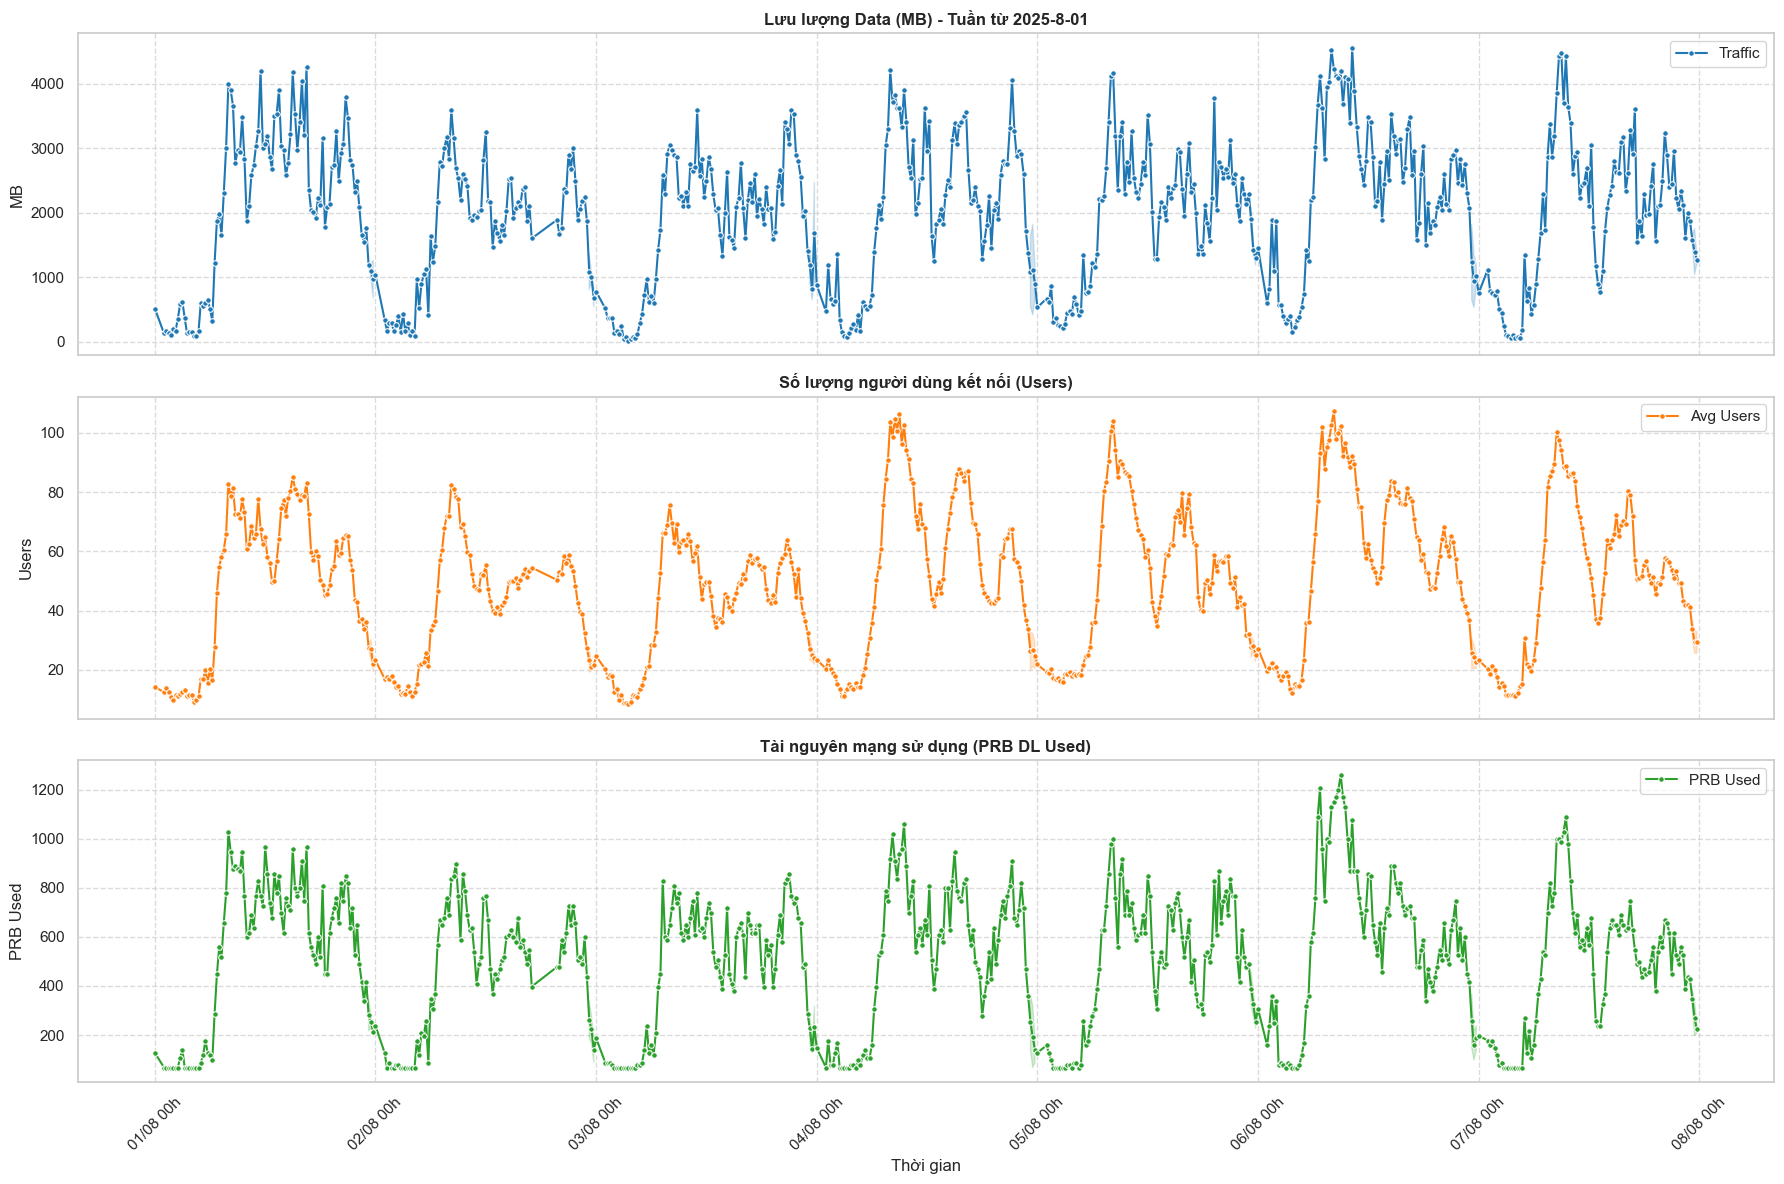

In [30]:
import matplotlib.dates as mdates
import pandas as pd

# --- CẤU HÌNH ---
target_cell_name = 'enodebB9'
start_date_str = '2025-8-01'  # 👉 SỬA NGÀY BẮT ĐẦU CỦA TUẦN TẠI ĐÂY (YYYY-MM-DD)

# --- XỬ LÝ ---
# Chuyển đổi chuỗi ngày thành datetime và tính ngày kết thúc (cộng 7 ngày)
start_date = pd.to_datetime(start_date_str)
end_date = start_date + pd.Timedelta(days=7) 

# Lọc trạm
df_cell = df_clean[df_clean['cell_name'] == target_cell_name].copy()

if df_cell.empty:
    print(f"❌ Lỗi: Không tìm thấy dữ liệu cho trạm '{target_cell_name}'.")
else:
    # Lọc dữ liệu trong khoảng [start_date, end_date)
    df_plot = df_cell[
        (df_cell['timestamp'] >= start_date) & 
        (df_cell['timestamp'] < end_date)
    ].sort_values('timestamp')

    if df_plot.empty:
        print(f"❌ Không có dữ liệu từ {start_date_str} đến {end_date.strftime('%Y-%m-%d')}.")
        # Gợi ý khoảng thời gian có dữ liệu
        min_date = df_cell['timestamp'].min().strftime('%Y-%m-%d')
        max_date = df_cell['timestamp'].max().strftime('%Y-%m-%d')
        print(f"📅 Dữ liệu của trạm này nằm trong khoảng: {min_date} ➡ {max_date}")
    else:
        print(f"📊 Đang vẽ biểu đồ tuần: {start_date.strftime('%d/%m')} - {end_date.strftime('%d/%m')} ({len(df_plot)} điểm dữ liệu)")

        # --- VẼ BIỂU ĐỒ ---
        fig, axes = plt.subplots(3, 1, figsize=(18, 12), sharex=True)

        # 1. Traffic (Thêm marker='o' để nhìn rõ từng điểm dữ liệu hơn trong view tuần)
        sns.lineplot(ax=axes[0], data=df_plot, x='timestamp', y='ps_traffic_mb', color='tab:blue', marker='o', markersize=4, label='Traffic')
        axes[0].set_title(f'Lưu lượng Data (MB) - Tuần từ {start_date_str}', fontweight='bold')
        axes[0].set_ylabel('MB')
        axes[0].grid(True, linestyle='--', alpha=0.7)
        axes[0].legend(loc='upper right')

        # 2. User Active
        sns.lineplot(ax=axes[1], data=df_plot, x='timestamp', y='avg_rrc_connected_user', color='tab:orange', marker='o', markersize=4, label='Avg Users')
        axes[1].set_title('Số lượng người dùng kết nối (Users)', fontweight='bold')
        axes[1].set_ylabel('Users')
        axes[1].grid(True, linestyle='--', alpha=0.7)

        # 3. PRB Usage
        sns.lineplot(ax=axes[2], data=df_plot, x='timestamp', y='prb_dl_used', color='tab:green', marker='o', markersize=4, label='PRB Used')
        axes[2].set_title('Tài nguyên mạng sử dụng (PRB DL Used)', fontweight='bold')
        axes[2].set_ylabel('PRB Used')
        axes[2].set_xlabel('Thời gian')
        axes[2].grid(True, linestyle='--', alpha=0.7)

        # --- Format Trục Thời Gian Cho View Tuần ---
        # Hiển thị ngày/tháng và giờ (VD: 01/11 12h)
        axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %Hh'))
        # Vạch chính: Mỗi ngày một vạch
        axes[2].xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
        # Vạch phụ (nhỏ): Mỗi 6 tiếng một vạch để dễ gióng giờ
        axes[2].xaxis.set_minor_locator(mdates.HourLocator(interval=6))
        
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
import os

# --- CẤU HÌNH ---
target_cell_name = 'enodebB9'
# Thư mục lưu file (tốt nhất lưu cùng chỗ với data gốc)
output_folder = '../datasets/viettel' 
output_filename = f'{target_cell_name}.csv'

# --- BƯỚC 1: LỌC DỮ LIỆU ---
# Lấy toàn bộ lịch sử dữ liệu của trạm này (đã được sort theo timestamp ở các bước trước)
df_export = df_clean[df_clean['cell_name'] == target_cell_name].copy()

if df_export.empty:
    print(f"❌ Lỗi: Không tìm thấy dữ liệu cho trạm {target_cell_name} để lưu.")
else:
    # --- BƯỚC 2: CHỌN CỘT (Optional) ---
    # Nếu bạn muốn file gọn nhẹ, chỉ giữ lại cột Time và các chỉ số quan trọng
    # Nếu muốn lấy HẾT các cột thì comment (bỏ) dòng code dưới đây đi
    cols_to_keep = [
        'timestamp',                # Thời gian chuẩn
        'ps_traffic_mb',            # Traffic
        'avg_rrc_connected_user',   # User
        'prb_dl_used',              # Tài nguyên mạng
        'prb_dl_available_total'    # Tài nguyên tổng (nếu cần tính %)
    ]
    
    # Kiểm tra xem các cột này có trong data không trước khi filter để tránh lỗi
    existing_cols = [col for col in cols_to_keep if col in df_export.columns]
    df_export = df_export[existing_cols]

    # --- BƯỚC 3: LƯU FILE ---
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    full_path = os.path.join(output_folder, output_filename)

    # index=False: Không lưu cột số thứ tự 0,1,2... vào file
    df_export.to_csv(full_path, index=False)

    print(f"✅ ĐÃ LƯU THÀNH CÔNG!")
    print(f"📂 File: {output_filename}")
    print(f"📍 Đường dẫn: {full_path}")
    print(f"📊 Kích thước: {df_export.shape[0]} dòng, {df_export.shape[1]} cột")
    
    print("\nXem trước dữ liệu trong file vừa lưu:")
    display(df_export.head())